<a href="https://colab.research.google.com/github/Ferdaus71/ML_Lab-performance/blob/main/ML_Lab_Naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
response = requests.get(url)

# Save the zip file
with open("smsspamcollection.zip", "wb") as f:
    f.write(response.content)

import zipfile

# Extract the file
with zipfile.ZipFile("smsspamcollection.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd

# Dataset from: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_table(
    'SMSSpamCollection',
    sep='\t',
    header=None,
    names=['label', 'message']
)

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df [ 'label' ] = df . label .map( { 'ham' : 0 , 'spam' : 1 })
df . head ( )

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], random_state=1
)

print("Original dataset contains", df.shape[0], "messages")
print("Training set contains", X_train.shape[0], "messages")
print("Testing set contains", X_test.shape[0], "messages")


Original dataset contains 5572 messages
Training set contains 4179 messages
Testing set contains 1393 messages


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()  # set the variable

train = count_vector.fit_transform(X_train)
test = count_vector.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# create the classifier
naive_bayes = MultinomialNB()

# train the classifier on the training set
naive_bayes.fit(train, y_train)


MultinomialNB()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
# predict using the model on the testing set
predictions = naive_bayes.predict(test)

# print the accuracy
print(" MultinomialNB Accuracy:", np.mean(predictions == y_test))
print(confusion_matrix(y_test, predictions))

 MultinomialNB Accuracy: 0.9885139985642498
[[1203    5]
 [  11  174]]


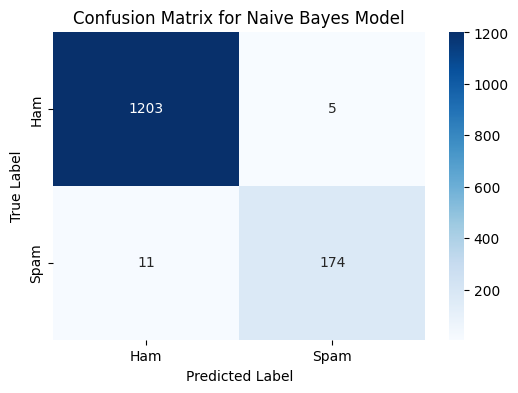

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'predictions' are already defined from previous steps
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))


[[1203    5]
 [  11  174]]


Now, let's try a different classification model: Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a Logistic Regression classifier
logistic_regression_model = LogisticRegression()

# Train the classifier on the training data
logistic_regression_model.fit(train, y_train)

# Make predictions on the testing data
logistic_regression_predictions = logistic_regression_model.predict(test)

# Evaluate the model's performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_regression_predictions))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logistic_regression_predictions))

Logistic Regression Accuracy: 0.9870782483847811

Logistic Regression Confusion Matrix:
[[1207    1]
 [  17  168]]
